In [21]:
import torch
import matplotlib.pyplot as plt

In [22]:
xs = torch.tensor([0,1,2,3,4,5,6,7.])
xs

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [23]:
ys = torch.tensor([1.86,1.31,0.62,0.09,-0.67,-1.23,-1.37, -1.45])
ys

tensor([ 1.8600,  1.3100,  0.6200,  0.0900, -0.6700, -1.2300, -1.3700, -1.4500])

In [24]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [25]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

**Forward pass**

In [26]:
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Cost**

$ C = \frac{1}{n} \sum_{i=1}^n (\hat{y_{i}} - y_{i})^2$

In [27]:
def mse(my_yhat , my_y):
    sigma = torch.sum((my_yhat - my_y ) ** 2)
    return sigma/len(my_y)

In [28]:
C = mse(yhats, ys)
C

tensor(21.7602, grad_fn=<DivBackward0>)

**autodiff**

In [29]:
C.backward()

In [30]:
m.grad

tensor([38.2950])

In [31]:
b.grad

tensor([6.7100])

$ \frac{\delta C}{\delta m}  = \frac{2}{n} \sum (\hat{y_i} - y_i) \cdot x_i$ 

In [32]:
2*1/len(ys)*torch.sum((yhats - ys) *xs)

tensor(38.2950, grad_fn=<MulBackward0>)

$ \frac{\delta C}{\delta m}  = \frac{2}{n} \sum (\hat{y_i} - y_i)$

In [33]:
2*1/len(ys)*torch.sum((yhats - ys))

tensor(6.7100, grad_fn=<MulBackward0>)

In [34]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.7100],
        [38.2950]])

**Visulaising**

In [39]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):

    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else :
        xlabel = 'm = {}'.format('%.3g' % my_m.item())
        ylabel = 'b = {}'.format('%.3g' % my_b.item())

    fig, ax = plt.subplots()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    ax.scatter(my_x, my_y)
    x_min , x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])


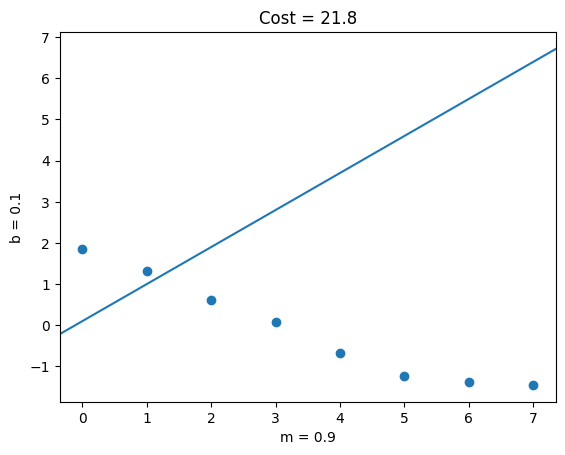

In [40]:
labeled_regression_plot(xs, ys, m ,b, C)

**Gradient Descent**

In [41]:
optim = torch.optim.SGD([m,b], lr=0.01)

In [42]:
optim.step()

In [43]:
C = mse(regression(xs, m,b), ys)

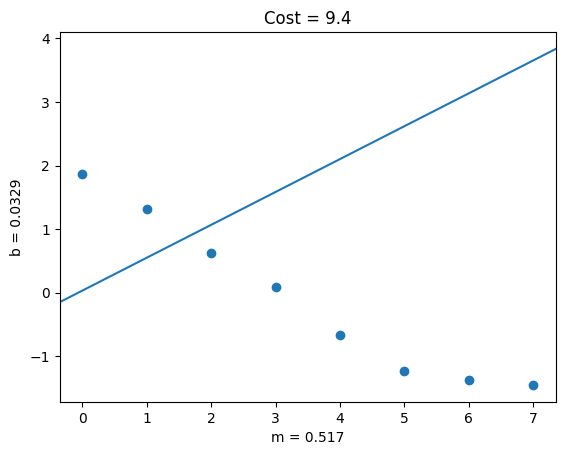

In [44]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False)

Repeat


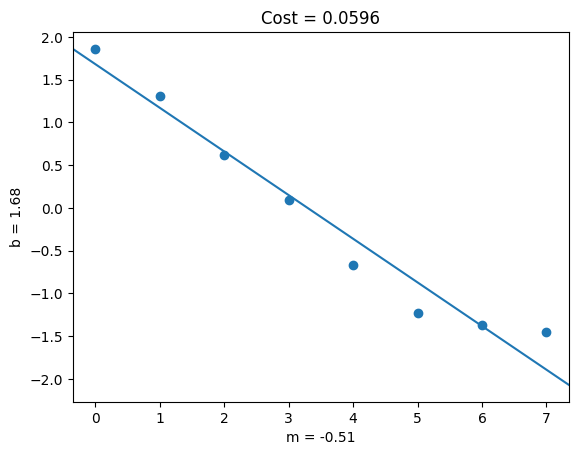

In [51]:
epochs = 500
for epoch in range(epochs): 
    
    optim.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2
    
    C.backward() # Step 3
    
    
    optim.step() # Step 4
labeled_regression_plot(xs, ys, m, b, C)